### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

**My GitHub repository.** : 
https://github.com/AthAd19/LSE_DA_NHS_analysis






# Assignment activity 2

## Prepare your workstation

In [1]:
# Import the libraries.
import pandas as pd
import numpy as np

# Import Matplotlib.
import matplotlib.pyplot as plt

In [2]:
# Import Data sets
ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')
nc = pd.read_excel('national_categories.xlsx')

tweets = pd.read_csv('tweets.csv')

In [3]:
# View the ACTUAL DURATION DataFrame
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [4]:
# View the REGIONAL APPOINTMENT DataFrame
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [5]:
# View the NATIONAL CATEGORIES DataFrame
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [6]:
# SENSE-CHECKING : ACTUAL DURATION

# Check Headers
print("Headers: ","\n", ad.columns,"\n")

Headers:  
 Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object') 



In [7]:
# Check for missing values.
ad_na = ad[ad.isna().any(axis=1)]

print(ad_na.size,"Rows with Missing Data \n")

ad.info()
ad.describe()

0 Rows with Missing Data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [8]:
# SENSE-CHECKING : APPOINTMENTS REGIONAL

# Check Headers
print("Headers: ","\n", ar.columns,"\n")

Headers:  
 Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object') 



In [9]:
# Check for missing values.
ar_na = ar[ar.isna().any(axis=1)]

print(ar_na.size,"Rows with Missing Data \n")

ar.info()
ar.describe()

0 Rows with Missing Data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [10]:
# SENSE-CHECKING : NATIONAL CATEGORIES

# Check Headers
print("Headers: ","\n", nc.columns,"\n")

Headers:  
 Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object') 



In [11]:
# Check for missing values.
nc_na = nc[nc.isna().any(axis=1)]

print(nc_na.size,"Rows with Missing Data \n")

nc.info()
nc.describe()

0 Rows with Missing Data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


## Explore the data set

### 2.1. How many locations are there in the data set?

In [12]:
# create User-defined function for repetitive counting of unique items
# under each header from 'nc' dataframe
def column_count(para, para_name):
    
    count = nc[para].value_counts().size
    print("Number of",para_name,":", count, "\n")
    return

# Run Column_count function for Locations
column_count('sub_icb_location_name',"Unique Locations")

Number of Unique Locations : 106 



### 2.2. What are the five locations with the highest number of records?

In [13]:
# five locations with the highest number of entries in 'nc' DataFrame
nc['sub_icb_location_name'].value_counts().head()

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64

In [14]:
# five locations with the highest number of appointments in 'nc' DataFrame
nc.groupby('sub_icb_location_name')\
        .sum('count_of_appointments')\
        .sort_values('count_of_appointments', ascending=False)\
        .head()

,count_of_appointments
sub_icb_location_name,
NHS North West London ICB - W2U3Z,12142390
NHS North East London ICB - A3A8R,9588891
NHS Kent and Medway ICB - 91Q,9286167
NHS Hampshire and Isle Of Wight ICB - D9Y0V,8288102
NHS South East London ICB - 72Q,7850170


In [15]:
# five locations with the highest number of entries in 'ad' DataFrame
ad['sub_icb_location_name'].value_counts().head()

NHS Norfolk and Waveney ICB - 26A                       1484
NHS Kent and Medway ICB - 91Q                           1484
NHS North West London ICB - W2U3Z                       1484
NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y    1484
NHS Greater Manchester ICB - 14L                        1484
Name: sub_icb_location_name, dtype: int64

In [16]:
# five locations with the highest number of appointments in 'ad' DataFrame
ad.groupby('sub_icb_location_name')\
        .sum('count_of_appointments')\
        .sort_values('count_of_appointments', ascending=False)\
        .head()

,count_of_appointments
sub_icb_location_name,
NHS North West London ICB - W2U3Z,6976986
NHS North East London ICB - A3A8R,5341883
NHS Kent and Medway ICB - 91Q,5209641
NHS Hampshire and Isle Of Wight ICB - D9Y0V,4712737
NHS South East London ICB - 72Q,4360079


### 2.3. How many service settings, context types, national categories, and appointment statuses are there?

In [17]:
# call on same User-defined function for counting service settings, 
# context types, and national categories
column_count('service_setting',"Service Settings")
column_count('context_type',"Context Types")
column_count('national_category',"National Categories")


Number of Service Settings : 5 

Number of Context Types : 3 

Number of National Categories : 18 



In [18]:
as_unique = ar['appointment_status'].value_counts()

print("Number of unique appt status: ", as_unique.size)

Number of unique appt status:  3


In [19]:
def col_list(para, para_name):
    print("List of", para_name,": \n",nc[para].unique(),"\n")
    return

col_list('service_setting',"Service Settings")
col_list('context_type',"Context Types")
col_list('national_category',"National Categories")


List of Service Settings : 
 ['Primary Care Network' 'Other' 'General Practice' 'Unmapped'
 'Extended Access Provision'] 

List of Context Types : 
 ['Care Related Encounter' 'Unmapped' 'Inconsistent Mapping'] 

List of National Categories : 
 ['Patient contact during Care Home Round' 'Planned Clinics' 'Home Visit'
 'General Consultation Acute' 'Structured Medication Review'
 'Care Home Visit' 'Unmapped' 'Clinical Triage'
 'Planned Clinical Procedure' 'Inconsistent Mapping'
 'Care Home Needs Assessment & Personalised Care and Support Planning'
 'General Consultation Routine'
 'Service provided by organisation external to the practice'
 'Unplanned Clinical Activity' 'Social Prescribing Service'
 'Non-contractual chargeable work'
 'Group Consultation and Group Education' 'Walk-in'] 



# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

### 3.1. Between what dates were appointments scheduled? 

In [20]:
# View the first & last five rows of appointment_date 
# for the ad DataFrame to determine the date format.

ad['appointment_date']

0         01-Dec-21
1         01-Dec-21
2         01-Dec-21
3         01-Dec-21
4         01-Dec-21
            ...    
137788    30-Jun-22
137789    30-Jun-22
137790    30-Jun-22
137791    30-Jun-22
137792    30-Jun-22
Name: appointment_date, Length: 137793, dtype: object

In [21]:
# Change the date format of ad['appointment_date'] to yyyy-mm-dd
ad["appointment_date"] = pd.to_datetime(ad["appointment_date"])

# View the DateFrame.
ad["appointment_date"]

0        2021-12-01
1        2021-12-01
2        2021-12-01
3        2021-12-01
4        2021-12-01
            ...    
137788   2022-06-30
137789   2022-06-30
137790   2022-06-30
137791   2022-06-30
137792   2022-06-30
Name: appointment_date, Length: 137793, dtype: datetime64[ns]

In [22]:
# Determine the minimum and maximum dates in the ad DataFrame.
print("Appointment dates in ar DataFrame are between",\
      ad["appointment_date"].min().date(),"and",\
      ad["appointment_date"].max().date() )

Appointment dates in ar DataFrame are between 2021-12-01 and 2022-06-30


In [23]:
# View the first & last five rows of appointment_date 
# for the nc DataFrame to determine the date format.

nc['appointment_date']

0        2021-08-02
1        2021-08-02
2        2021-08-02
3        2021-08-02
4        2021-08-02
            ...    
817389   2022-06-30
817390   2022-06-30
817391   2022-06-30
817392   2022-06-30
817393   2022-06-30
Name: appointment_date, Length: 817394, dtype: datetime64[ns]

*__~ nc data set : Appointment date already in__ yyy-mm-dd __format --> no change needed ~__*

In [24]:
# Determine the minimum and maximum dates in the nc DataFrame.
print("Appointment dates in nc DataFrame are between",\
      nc["appointment_date"].min().date(),"and",\
      nc["appointment_date"].max().date() )

Appointment dates in nc DataFrame are between 2021-08-01 and 2022-06-30


### 3.2. Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

_For each of these service settings, determine the number of records available for the period and the location_

In [25]:
# First, I check if there's more that 1 Hospital in NHS North West London
for word in nc['sub_icb_location_name'].unique():
    if 'nhs north west london' in word.lower(): 
        print(word)

NHS North West London ICB - W2U3Z


In [26]:
# Filter to show only records from "NHS North West London ICB - W2U3Z"
nc_NWLon = nc[nc['sub_icb_location_name']=="NHS North West London ICB - W2U3Z"]

nc_NWLon.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
794321,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,607,2021-08
794322,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,6,2021-08
794323,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,47,2021-08
794324,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Walk-in,74,2021-08
794325,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Planned Clinics,98,2021-08


In [27]:
# Further filter to show only records from from 1 January to 1 June 2022
nc_NWLon_0101_010622 = nc_NWLon[(nc_NWLon['appointment_date']>"2021-12-31") & \
                                (nc_NWLon['appointment_date']<"2022-06-02")]

nc_NWLon_0101_010622

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
800289,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,496,2022-01
800290,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Clinical Triage,19,2022-01
800291,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
800292,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,16,2022-01
800293,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Planned Clinics,29,2022-01
...,...,...,...,...,...,...,...,...
806220,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,Home Visit,4,2022-06
806221,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Routine,27,2022-06
806222,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Unplanned Clinical Activity,626,2022-06
806223,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Acute,224,2022-06


In [28]:
nc_NWLon_0101_010622.groupby('service_setting')\
        .sum('count_of_appointments')\
        .sort_values('count_of_appointments', ascending=False)\
        .head()

,count_of_appointments
service_setting,
General Practice,4804239
Unmapped,391106
Other,152897
Primary Care Network,109840
Extended Access Provision,98159


Results: **General Practice** was the most popular service setting for NHS North West London from 1 January to 1 June 2022

In [29]:
# number of records (just for comparison)
nc['service_setting'].value_counts()

General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64


### 3.3. Which month had the highest number of appointments?

In [30]:
# Number of appointments per month == sum of count_of_appointments by month.
# nc DataFrame used as it is the largest dataframe
nc.groupby(nc.appointment_date.dt.month)\
        .sum('count_of_appointments')\
        .sort_values('count_of_appointments', ascending=False)

,count_of_appointments
appointment_date,
11,30405070
10,30303834
3,29595038
9,28522501
5,27495508
6,25828078
1,25635474
2,25355260
12,25140776


Result: The most appointments were made for the month of **November (11)**

In [31]:
# number of appts per month in ar DataFrame (just for comparison)
ar.groupby('appointment_month')\
        .sum('count_of_appointments')\
        .sort_values('count_of_appointments', ascending=False)

,count_of_appointments
appointment_month,
2021-11,30405070
2021-10,30303834
2022-03,29595038
2021-09,28522501
2020-10,28301932
2022-05,27495508
2021-03,27225424
2020-01,27199296
2021-06,26784182


### 3.4. What was the total number of records per month?

In [32]:
# Total number of records per month.
nc.groupby(nc.appointment_date.dt.month).count()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
appointment_date,,,,,,,,
1,71896,71896,71896,71896,71896,71896,71896,71896
2,71769,71769,71769,71769,71769,71769,71769,71769
3,82822,82822,82822,82822,82822,82822,82822,82822
4,70012,70012,70012,70012,70012,70012,70012,70012
5,77425,77425,77425,77425,77425,77425,77425,77425
6,74168,74168,74168,74168,74168,74168,74168,74168
8,69999,69999,69999,69999,69999,69999,69999,69999
9,74922,74922,74922,74922,74922,74922,74922,74922
10,74078,74078,74078,74078,74078,74078,74078,74078


# 
# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [33]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [34]:
# Change the data type of the appointment month to string to allow for 
# easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype("string")

nc['appointment_month']

0         2021-08
1         2021-08
2         2021-08
3         2021-08
4         2021-08
           ...   
817389    2022-06
817390    2022-06
817391    2022-06
817392    2022-06
817393    2022-06
Name: appointment_month, Length: 817394, dtype: string

### OVERALL TREND FOR APPOINTMENT COUNT OVER THE MONTHS


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

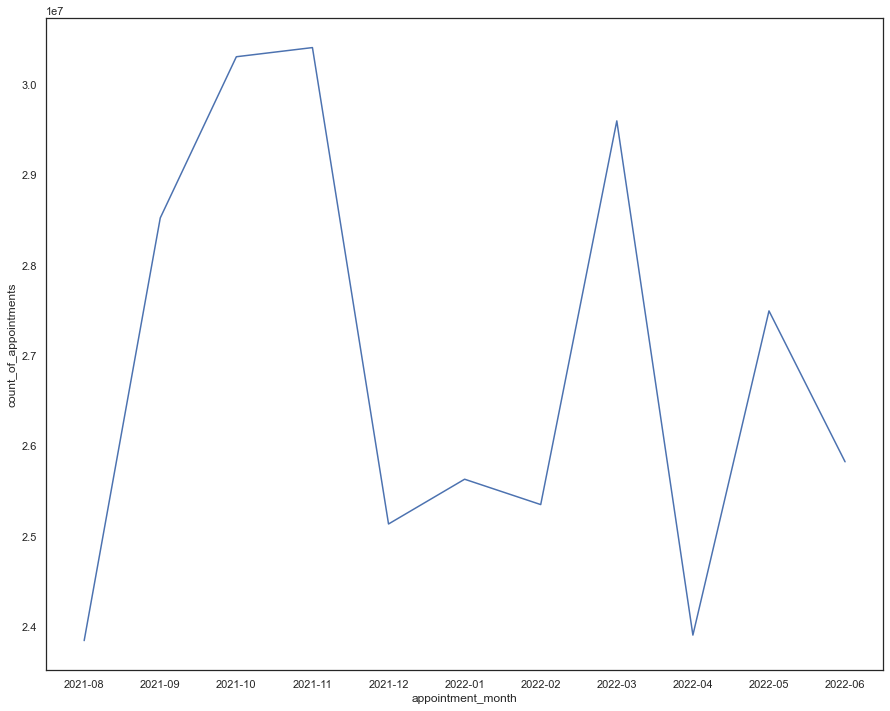

In [35]:
nc_mthly_appt = nc.groupby(['appointment_month'])\
                        .sum('count_of_appointments')
sns.lineplot(x='appointment_month', y='count_of_appointments', \
            data=nc_mthly_appt, ci=None)


### Number of appointments per month for service settings

In [36]:
nc_SS_mthly_appt = nc.groupby(['service_setting','appointment_month'])\
                        .sum('count_of_appointments')

nc_SS_mthly_appt.reindex(['General Practice','Unmapped','Other',\
                          'Extended Access Provision','Primary Care Network'], \
                          level='service_setting')

nc_SS_mthly_appt

count_of_appointments
service_setting           appointment_month                       
Extended Access Provision 2021-08                           160927
                          2021-09                           187906
                          2021-10                           209539
                          2021-11                           207577
                          2021-12                           173504
                          2022-01                           186375
                          2022-02                           196627
                          2022-03                           231905
                          2022-04                           192284
                          2022-05                           220511
                          2022-06                           209652
General Practice          2021-08                         21575852
                          2021-09                         25940821
                          2021-10                         27606171
                          2021-11                         27767889
                          2021-12                         23008818
                          2022-01                         23583053
                          2022-02                         23305934
                          2022-03                         27187368
                          2022-04                         21916791
                          2022-05                         25238620
                          2022-06                         23680374
Other                     2021-08                           449101
                          2021-09                           527174
                          2021-10                           556487
                          2021-11                           558784
                          2021-12                           464718
                          2022-01                           457440
                          2022-02                           456153
                          2022-03                           530677
                          2022-04                           437402
                          2022-05                           503327
                          2022-06                           478813
Primary Care Network      2021-08                           432448
                          2021-09                           530485
                          2021-10                           564981
                          2021-11                           614324
                          2021-12                           539479
                          2022-01                           569044
                          2022-02                           585300
                          2022-03                           702176
                          2022-04                           606270
                          2022-05                           712280
                          2022-06                           700599
Unmapped                  2021-08                          1233843
                          2021-09                          1336115
                          2021-10                          1366656
                          2021-11                          1256496
                          2021-12                           954257
                          2022-01                           839562
                          2022-02                           811246
                          2022-03                           942912
                          2022-04                           760313
                          2022-05                           820770
                          2022-06                           758640

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

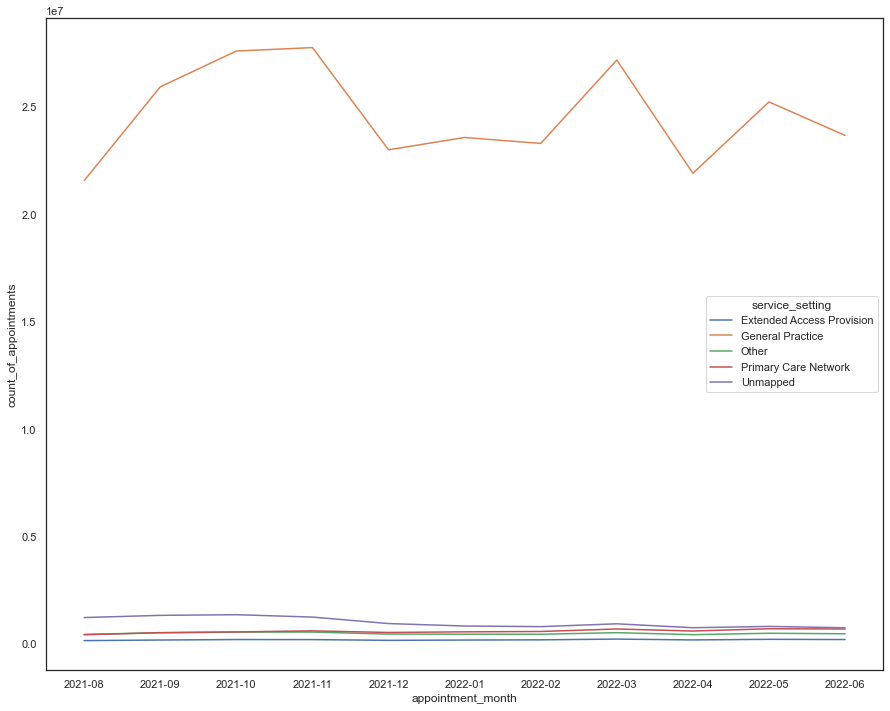

In [37]:
sns.lineplot(x='appointment_month', y='count_of_appointments', \
             hue='service_setting', data=nc_SS_mthly_appt, ci=None)

Since the 'General Pratice' service setting has so much more appointments 
than the other service settings, it is difficult to observe the trends in
other service settings. Hence, I have chosen to plot the rest separately

In [38]:
# Exclude 'General Practice'
nc_SS_nonGP = nc[nc['service_setting']!='General Practice']

nc_SS_nonGP_mthly_appt = nc_SS_nonGP.groupby(['service_setting','appointment_month'])\
                        .sum('count_of_appointments')

nc_SS_nonGP_mthly_appt

count_of_appointments
service_setting           appointment_month                       
Extended Access Provision 2021-08                           160927
                          2021-09                           187906
                          2021-10                           209539
                          2021-11                           207577
                          2021-12                           173504
                          2022-01                           186375
                          2022-02                           196627
                          2022-03                           231905
                          2022-04                           192284
                          2022-05                           220511
                          2022-06                           209652
Other                     2021-08                           449101
                          2021-09                           527174
                          2021-10                           556487
                          2021-11                           558784
                          2021-12                           464718
                          2022-01                           457440
                          2022-02                           456153
                          2022-03                           530677
                          2022-04                           437402
                          2022-05                           503327
                          2022-06                           478813
Primary Care Network      2021-08                           432448
                          2021-09                           530485
                          2021-10                           564981
                          2021-11                           614324
                          2021-12                           539479
                          2022-01                           569044
                          2022-02                           585300
                          2022-03                           702176
                          2022-04                           606270
                          2022-05                           712280
                          2022-06                           700599
Unmapped                  2021-08                          1233843
                          2021-09                          1336115
                          2021-10                          1366656
                          2021-11                          1256496
                          2021-12                           954257
                          2022-01                           839562
                          2022-02                           811246
                          2022-03                           942912
                          2022-04                           760313
                          2022-05                           820770
                          2022-06                           758640

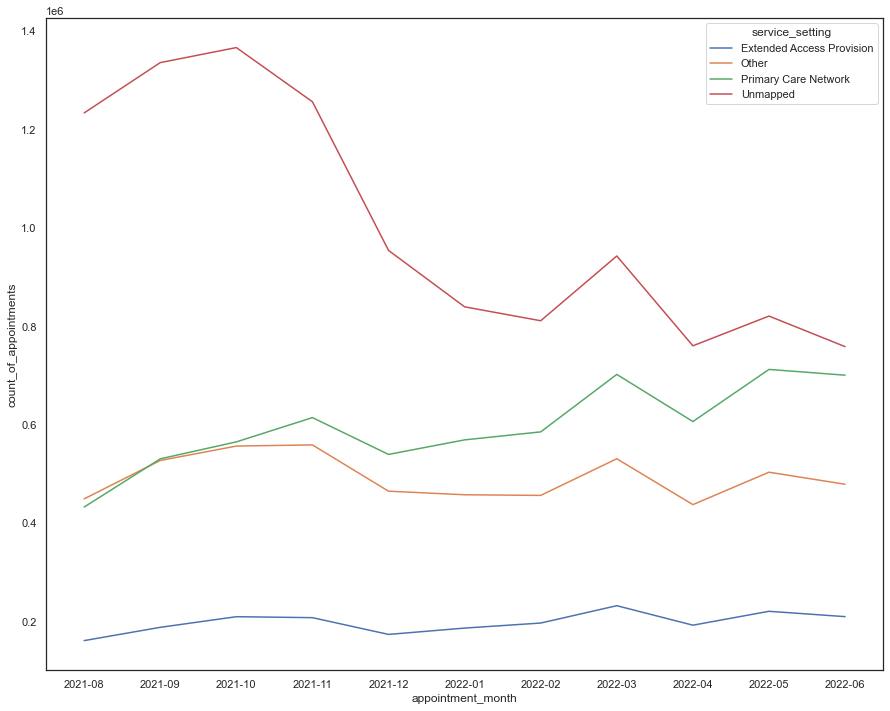

In [39]:
line_nc_SS_nonGP_mthly_appt = sns.lineplot(x='appointment_month', y='count_of_appointments', \
             hue='service_setting', data=nc_SS_nonGP_mthly_appt)

### Number of appointments per month for context types

In [40]:
nc_CT_mthly_appt = nc.groupby(['context_type','appointment_month'])\
                        .sum('count_of_appointments')
nc_CT_mthly_appt

count_of_appointments
context_type           appointment_month                       
Care Related Encounter 2021-08                         20255235
                       2021-09                         24404251
                       2021-10                         26125201
                       2021-11                         26282778
                       2021-12                         21798612
                       2022-01                         22441947
                       2022-02                         22211021
                       2022-03                         25928850
                       2022-04                         20904193
                       2022-05                         24101243
                       2022-06                         22621827
Inconsistent Mapping   2021-08                          2363093
                       2021-09                          2782135
                       2021-10                          2811977
                       2021-11                          2865796
                       2021-12                          2387907
                       2022-01                          2353965
                       2022-02                          2332993
                       2022-03                          2723276
                       2022-04                          2248554
                       2022-05                          2573495
                       2022-06                          2447611
Unmapped               2021-08                          1233843
                       2021-09                          1336115
                       2021-10                          1366656
                       2021-11                          1256496
                       2021-12                           954257
                       2022-01                           839562
                       2022-02                           811246
                       2022-03                           942912
                       2022-04                           760313
                       2022-05                           820770
                       2022-06                           758640

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

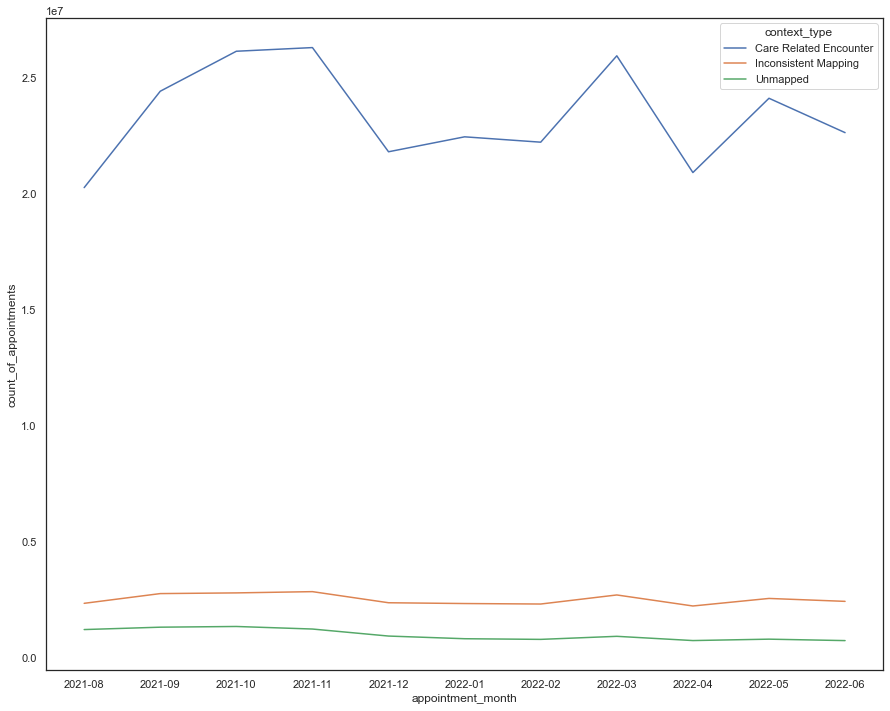

In [41]:
sns.lineplot(x='appointment_month', y='count_of_appointments', \
             hue='context_type', data=nc_CT_mthly_appt, ci=None)

separate "Care Related Encounter" to view trend more clearly

Text(0.5, 1.0, 'Context Type: Care Related Encounter)')

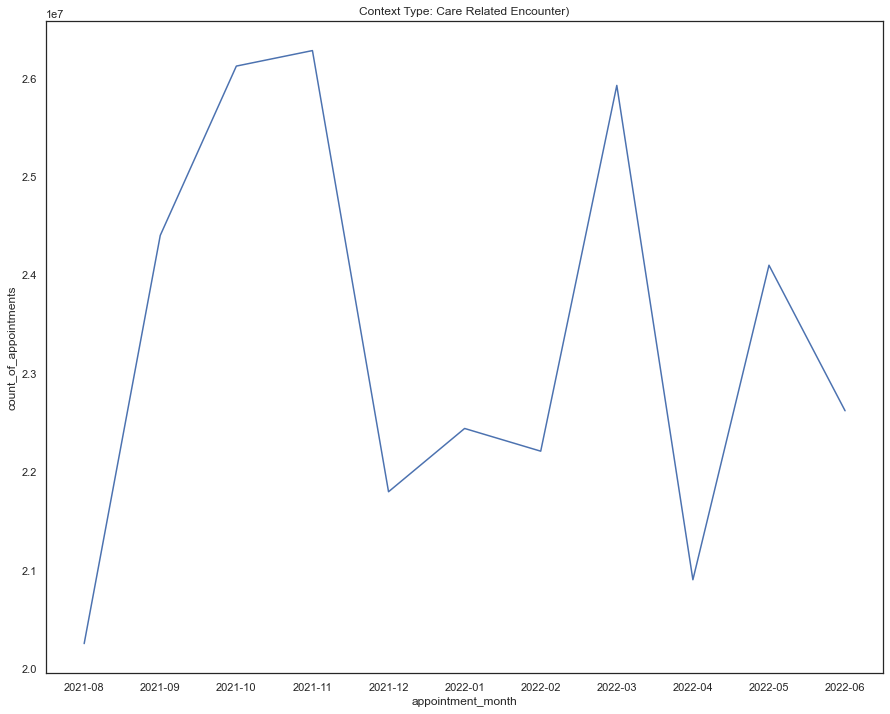

In [42]:
nc_CT_CRE = nc[nc['context_type']=='Care Related Encounter']

nc_CT_CRE_mthly = nc_CT_CRE.groupby(['appointment_month'])\
                        .sum('count_of_appointments')

line_nc_CT_CRE_mthly = sns.lineplot(x='appointment_month',\
                                         y='count_of_appointments', \
                                 data=nc_CT_CRE_mthly, ci=None)

line_nc_CT_CRE_mthly.set_title("Context Type: Care Related Encounter)", size=12)

In [43]:
# exclude "Care Related Encounter"
nc_CT_nonCRE = nc[nc['context_type']!='Care Related Encounter']

nc_CT_nonCRE_mthly_appt = nc_CT_nonCRE.groupby(['context_type','appointment_month'])\
                        .sum('count_of_appointments')

nc_CT_nonCRE_mthly_appt

count_of_appointments
context_type         appointment_month                       
Inconsistent Mapping 2021-08                          2363093
                     2021-09                          2782135
                     2021-10                          2811977
                     2021-11                          2865796
                     2021-12                          2387907
                     2022-01                          2353965
                     2022-02                          2332993
                     2022-03                          2723276
                     2022-04                          2248554
                     2022-05                          2573495
                     2022-06                          2447611
Unmapped             2021-08                          1233843
                     2021-09                          1336115
                     2021-10                          1366656
                     2021-11                          1256496
                     2021-12                           954257
                     2022-01                           839562
                     2022-02                           811246
                     2022-03                           942912
                     2022-04                           760313
                     2022-05                           820770
                     2022-06                           758640

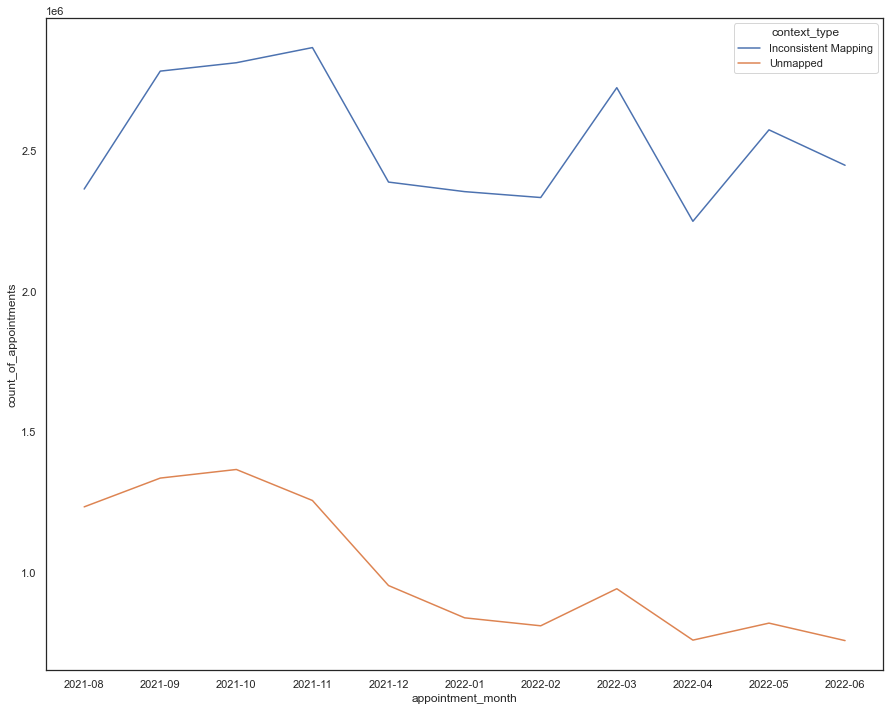

In [44]:
line_nc_CT_nonCRE_mthly_appt = sns.lineplot(x='appointment_month', y='count_of_appointments', \
             hue='context_type', data=nc_CT_nonCRE_mthly_appt)

### Number of appointments per month for national categories

In [45]:
nc_NC_mthly_appt = nc.groupby(['national_category','appointment_month'])\
                        .sum('count_of_appointments')
nc_NC_mthly_appt

count_of_appointments
national_category                                  appointment_month                       
Care Home Needs Assessment & Personalised Care ... 2021-08                            29676
                                                   2021-09                            33503
                                                   2021-10                            32441
                                                   2021-11                            38827
                                                   2021-12                            34653
...                                                                                     ...
Walk-in                                            2022-02                            31665
                                                   2022-03                            38070
                                                   2022-04                            32346
                                                   2022-05                            37687
                                                   2022-06                            35935

[198 rows x 1 columns]

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

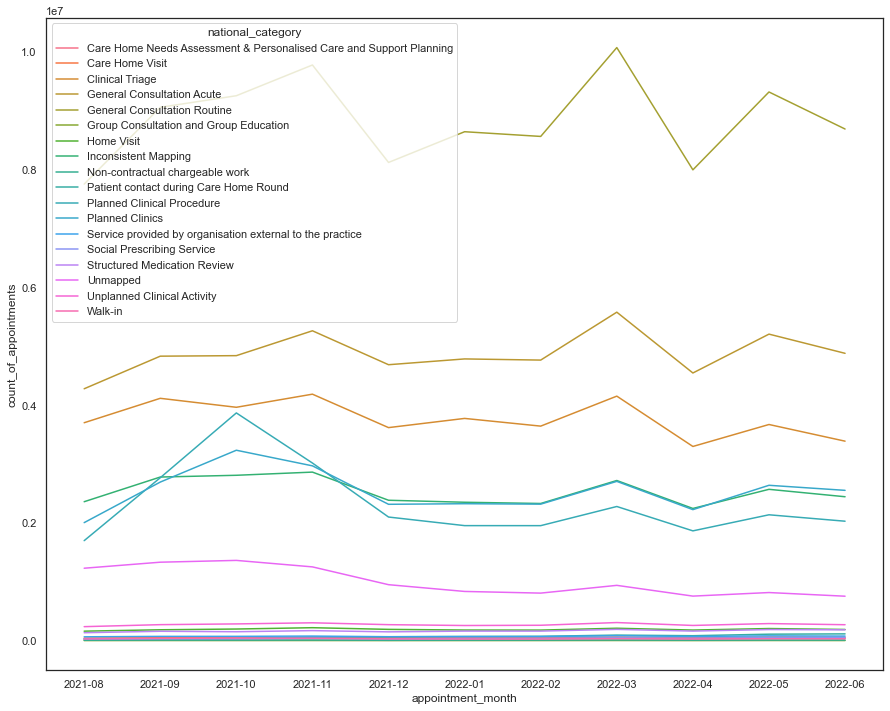

In [46]:
sns.lineplot(x='appointment_month', y='count_of_appointments', \
             hue='national_category', data=nc_NC_mthly_appt, ci=None)

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [110]:
# Create a separate data set that can be used in future weeks. 
nc_Summer = nc[nc['appointment_month']=='2021-08']

nc_Summer['service_setting'] =pd.Categorical(nc_Summer['service_setting'], ['General Practice','Unmapped',\
                                              'Primary Care Network','Other','Extended Access Provision'])

nc_SS_Summer = nc_Summer.groupby(['service_setting','appointment_date'])\
                        .sum('count_of_appointments')

# View output.
nc_SS_Summer

C:\Users\athir\AppData\Local\Temp/ipykernel_38108/2511742046.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_Summer['service_setting'] =pd.Categorical(nc_Summer['service_setting'], ['General Practice','Unmapped',\


count_of_appointments
service_setting           appointment_date                       
General Practice          2021-08-01                         3411
                          2021-08-02                      1108073
                          2021-08-03                      1056435
                          2021-08-04                       988285
                          2021-08-05                       968191
...                                                           ...
Extended Access Provision 2021-08-27                         5781
                          2021-08-28                         2088
                          2021-08-29                          412
                          2021-08-30                          305
                          2021-08-31                         8281

[155 rows x 1 columns]

In [127]:
nc_days_Summer = nc_Summer

nc_days_Summer['DaysofWeek'] = nc_days_Summer['appointment_date'].dt.day_name()

nc_week_Summer = nc_days_Summer.groupby(['appointment_date','DaysofWeek'])\
                        .sum('count_of_appointments').head(7)

nc_week_Summer

C:\Users\athir\AppData\Local\Temp/ipykernel_38108/1518457493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_days_Summer['DaysofWeek'] = nc_days_Summer['appointment_date'].dt.day_name()


,,count_of_appointments
appointment_date,DaysofWeek,
2021-08-01,Sunday,5627
2021-08-02,Monday,1222768
2021-08-03,Tuesday,1169920
2021-08-04,Wednesday,1093532
2021-08-05,Thursday,1074043
2021-08-06,Friday,1032165
2021-08-07,Saturday,26245


Overall:
Min appointments on Sunday, Max appointments on Mondays

Text(0.5, 1.0, 'Number of Appt by Service Setting in Summer 2021')

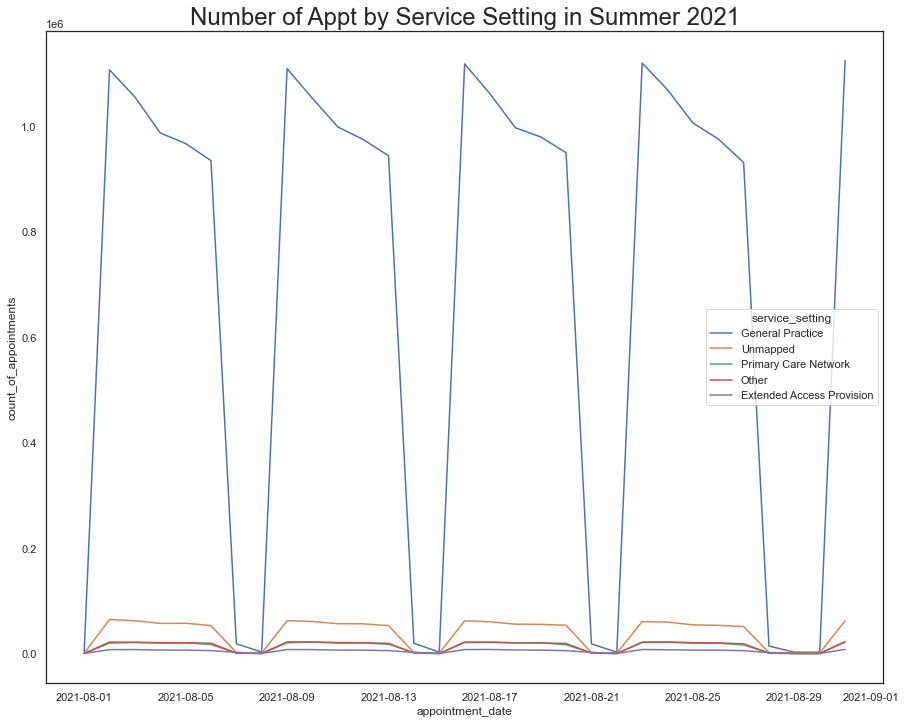

In [90]:
# Create lineplot for Summer (August 2021) with Service Setting differentiated by colour
line_nc_SS_Summer = sns.lineplot(x='appointment_date',\
                                 y='count_of_appointments', \
                                 hue='service_setting', \
                                 data=nc_SS_Summer, ci=None)

line_nc_SS_Summer.set_title("Number of Appt by Service Setting in Summer 2021", size=24)

### 
**Since the 'General Practice' service setting is much more than the other service settings, it is difficult to see the trends in other service settings. Hence, I have also excluded 'General Practice' to observe the other service settings.** 
### 

Text(0.5, 1.0, 'Number of Appt by Service Setting in Summer 2021 (excl. GP)')

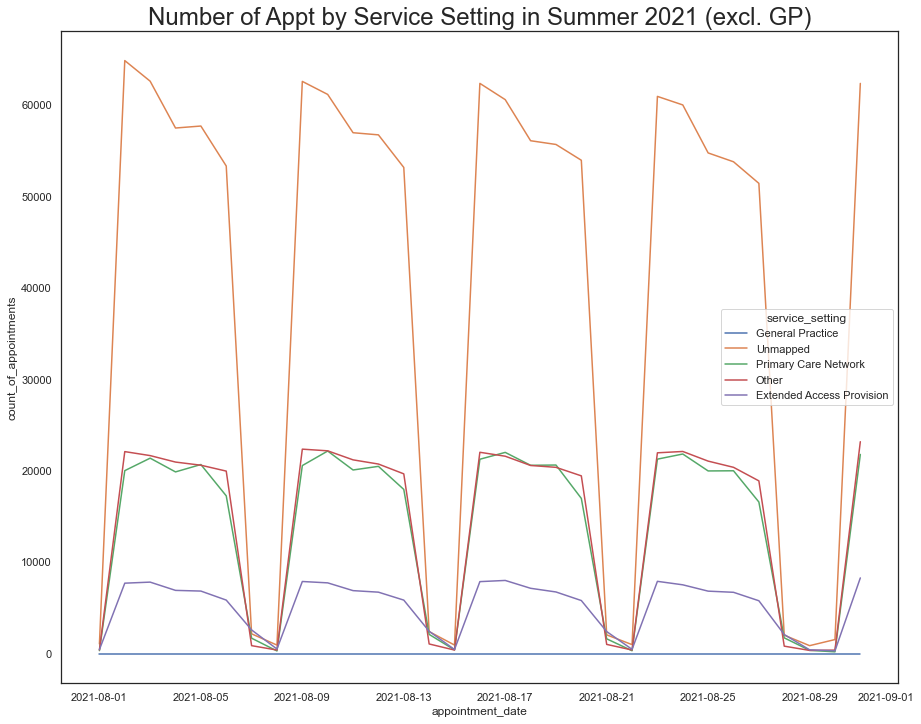

In [91]:
nc_nonGP_Summer = nc_Summer[nc_Summer['service_setting']!='General Practice']

nc_nonGP_Summer_appt = nc_nonGP_Summer.groupby(['service_setting','appointment_date'])\
                        .sum('count_of_appointments')

line_nc_nonGP_Summer_appt = sns.lineplot(x='appointment_date',\
                                 y='count_of_appointments', \
                                 hue='service_setting', \
                                 data=nc_nonGP_Summer_appt, ci=None)

line_nc_nonGP_Summer_appt.set_title("Number of Appt by Service Setting in Summer 2021 (excl. GP)", size=24)

**Autumn (October 2021):**

In [79]:
# Create a separate data set that can be used in future weeks. 
nc_Autumn = nc[nc['appointment_month']=='2021-10']

nc_Autumn['service_setting'] =pd.Categorical(nc_Autumn['service_setting'], ['General Practice','Unmapped',\
                                                'Primary Care Network','Other','Extended Access Provision'])

nc_SS_Autumn = nc_Autumn.groupby(['service_setting','appointment_date'])\
                        .sum('count_of_appointments')

# View output.
nc_SS_Autumn

C:\Users\athir\AppData\Local\Temp/ipykernel_38108/725872755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_Autumn['service_setting'] =pd.Categorical(nc_Autumn['service_setting'], ['General Practice','Unmapped',\


count_of_appointments
service_setting           appointment_date                       
General Practice          2021-10-01                      1130646
                          2021-10-02                       509102
                          2021-10-03                        35915
                          2021-10-04                      1320191
                          2021-10-05                      1254690
...                                                           ...
Extended Access Provision 2021-10-27                         8198
                          2021-10-28                         7327
                          2021-10-29                         6694
                          2021-10-30                         4236
                          2021-10-31                         1113

[155 rows x 1 columns]

In [143]:
nc_days_Autumn = nc_Autumn

nc_days_Autumn['DaysofWeek'] = nc_days_Autumn['appointment_date'].dt.day_name()

nc_week_Autumn = nc_days_Autumn.groupby(['appointment_date','DaysofWeek'])\
                        .sum('count_of_appointments').head(7)

nc_week_Autumn

C:\Users\athir\AppData\Local\Temp/ipykernel_38108/3515919789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_days_Autumn['DaysofWeek'] = nc_days_Autumn['appointment_date'].dt.day_name()


,,count_of_appointments
appointment_date,DaysofWeek,
2021-10-01,Friday,1239567
2021-10-02,Saturday,563328
2021-10-03,Sunday,41368
2021-10-04,Monday,1445471
2021-10-05,Tuesday,1375693
2021-10-06,Wednesday,1315627
2021-10-07,Thursday,1312076


Overall:
Min appointments on Sunday, Max appointments on Mondays

Text(0.5, 1.0, 'Number of Appt by Service Setting in Autumn 2021')

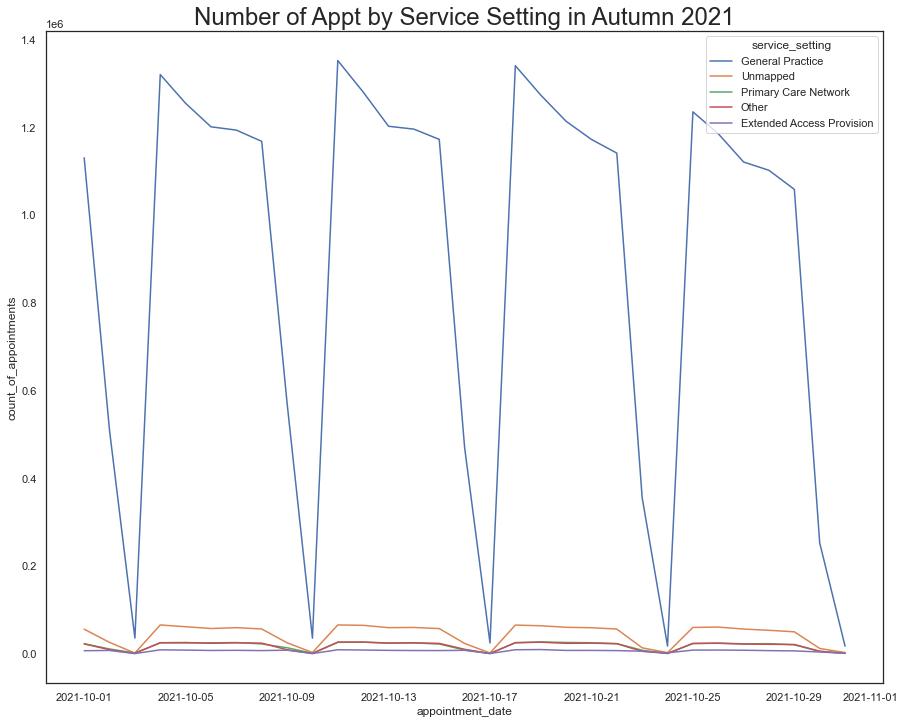

In [80]:
# Create lineplot for Autumn (October 2021) with Service Setting differentiated by colour
line_nc_SS_Autumn = sns.lineplot(x='appointment_date',\
                                 y='count_of_appointments', \
                                 hue='service_setting', \
                                 data=nc_SS_Autumn, ci=None)

line_nc_SS_Autumn.set_title("Number of Appt by Service Setting in Autumn 2021", size=24)

Text(0.5, 1.0, 'Number of Appt by Service Setting in Autumn 2021 (excl. GP)')

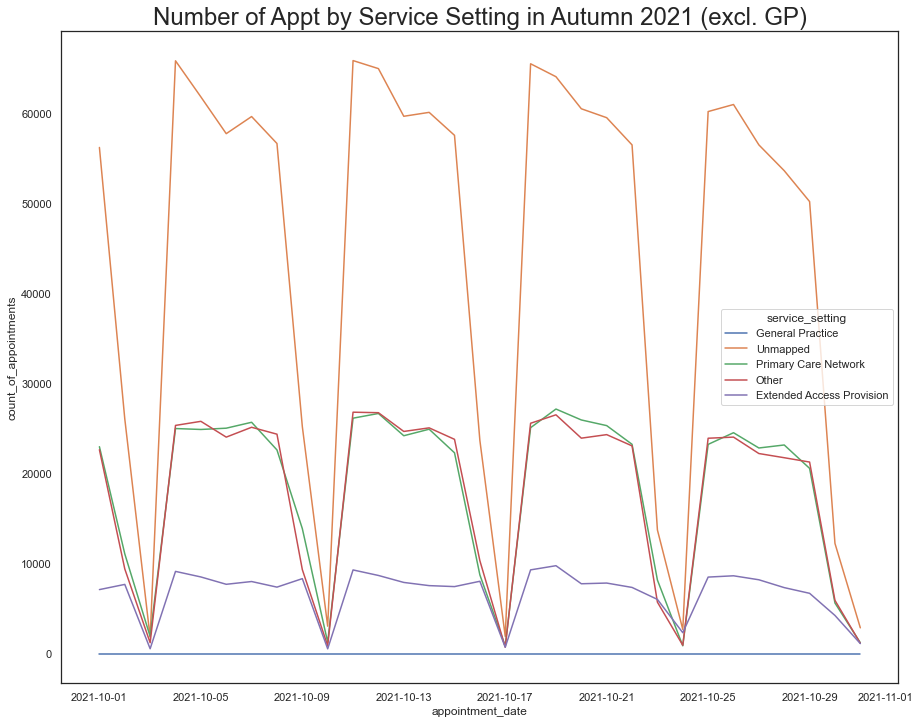

In [81]:
nc_nonGP_Autumn = nc_Autumn[nc_Autumn['service_setting']!='General Practice']

nc_nonGP_Autumn_appt = nc_nonGP_Autumn.groupby(['service_setting','appointment_date'])\
                        .sum('count_of_appointments')

line_nc_nonGP_Autumn_appt = sns.lineplot(x='appointment_date',\
                                 y='count_of_appointments', \
                                 hue='service_setting', \
                                 data=nc_nonGP_Autumn_appt, ci=None)

line_nc_nonGP_Autumn_appt.set_title("Number of Appt by Service Setting in Autumn 2021 (excl. GP)", size=24)

**Winter (January 2022):**

In [82]:
# Create a separate data set that can be used in future weeks. 
nc_Winter = nc[nc['appointment_month']=='2022-01']

nc_Winter['service_setting'] =pd.Categorical(nc_Winter['service_setting'], ['General Practice','Unmapped',\
                                                'Primary Care Network','Other','Extended Access Provision'])

nc_SS_Winter = nc_Winter.groupby(['service_setting','appointment_date'])\
                        .sum('count_of_appointments')

# View output.
nc_SS_Winter

C:\Users\athir\AppData\Local\Temp/ipykernel_38108/2694874197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_Winter['service_setting'] =pd.Categorical(nc_Winter['service_setting'], ['General Practice','Unmapped',\


count_of_appointments
service_setting           appointment_date                       
General Practice          2022-01-01                         3578
                          2022-01-02                         3118
                          2022-01-03                         6079
                          2022-01-04                      1196264
                          2022-01-05                      1139640
...                                                           ...
Extended Access Provision 2022-01-27                         8706
                          2022-01-28                         7459
                          2022-01-29                         2586
                          2022-01-30                          530
                          2022-01-31                         9962

[155 rows x 1 columns]

In [147]:
nc_days_Winter = nc_Winter

nc_days_Winter['DaysofWeek'] = nc_days_Winter['appointment_date'].dt.day_name()

nc_week_Winter = nc_days_Winter.groupby(['appointment_date','DaysofWeek'])\
                        .sum('count_of_appointments').head(14)

nc_week_Winter

C:\Users\athir\AppData\Local\Temp/ipykernel_38108/3453712099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_days_Winter['DaysofWeek'] = nc_days_Winter['appointment_date'].dt.day_name()


,,count_of_appointments
appointment_date,DaysofWeek,
2022-01-01,Saturday,4891
2022-01-02,Sunday,5012
2022-01-03,Monday,9123
2022-01-04,Tuesday,1299772
2022-01-05,Wednesday,1239196
2022-01-06,Thursday,1221524
2022-01-07,Friday,1175239
2022-01-08,Saturday,39681
2022-01-09,Sunday,9085


Overall:
Min appointments on Sunday, Max appointments on Mondays

Text(0.5, 1.0, 'Number of Appt by Service Setting in Winter 2022')

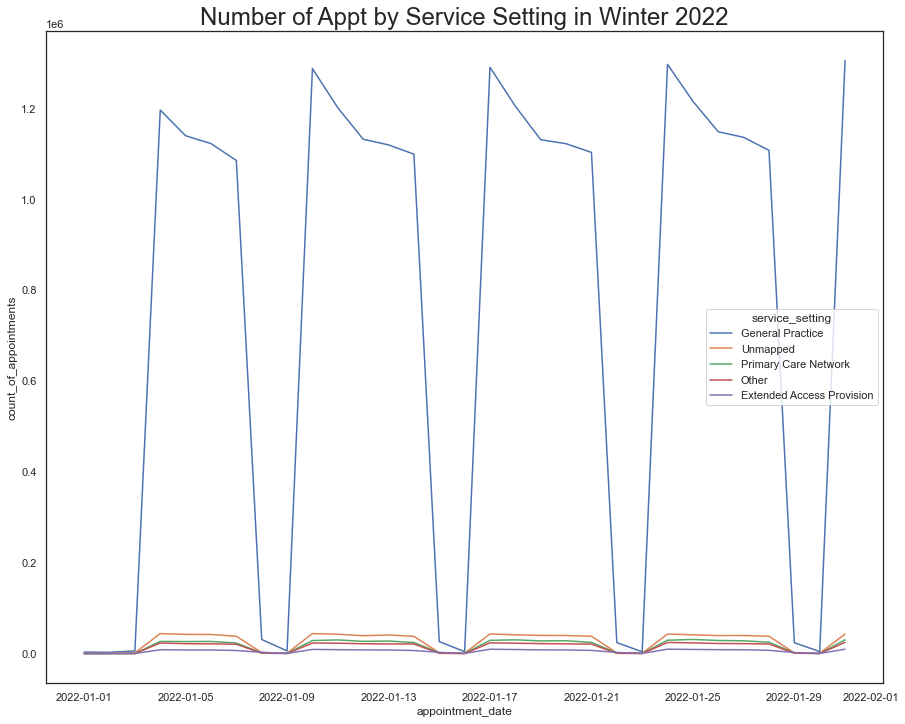

In [92]:
# Create lineplot for Winter (October 2021) with Service Setting differentiated by colour
line_nc_SS_Winter = sns.lineplot(x='appointment_date',\
                                 y='count_of_appointments', \
                                 hue='service_setting', \
                                 data=nc_SS_Winter, ci=None)

line_nc_SS_Winter.set_title("Number of Appt by Service Setting in Winter 2022", size=24)

Text(0.5, 1.0, 'Number of Appt by Service Setting in Winter 2022 (excl. GP)')

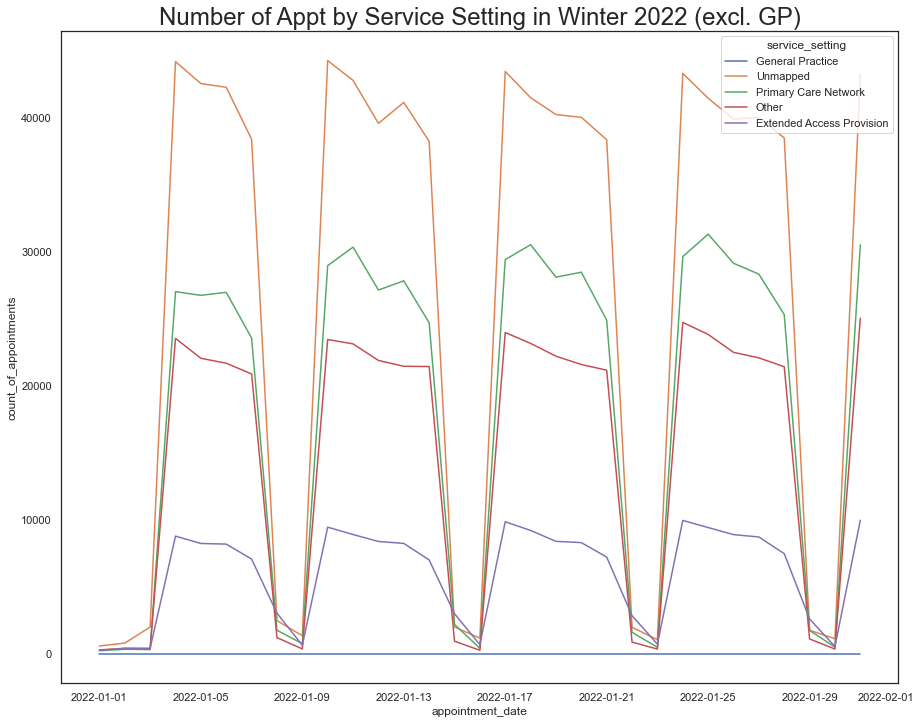

In [93]:
nc_nonGP_Winter = nc_Winter[nc_Winter['service_setting']!='General Practice']

nc_nonGP_Winter_appt = nc_nonGP_Winter.groupby(['service_setting','appointment_date'])\
                        .sum('count_of_appointments')

line_nc_nonGP_Winter_appt = sns.lineplot(x='appointment_date',\
                                 y='count_of_appointments', \
                                 hue='service_setting', \
                                 data=nc_nonGP_Winter_appt, ci=None)

line_nc_nonGP_Winter_appt.set_title("Number of Appt by Service Setting in Winter 2022 (excl. GP)", size=24)

**Spring (April 2022):**

In [94]:
# Create a separate data set that can be used in future weeks. 
nc_Spring = nc[nc['appointment_month']=='2021-10']

nc_Spring['service_setting'] =pd.Categorical(nc_Spring['service_setting'], ['General Practice','Unmapped',\
                                                'Primary Care Network','Other','Extended Access Provision'])

nc_SS_Spring = nc_Spring.groupby(['service_setting','appointment_date'])\
                        .sum('count_of_appointments')

# View output.
nc_SS_Spring

C:\Users\athir\AppData\Local\Temp/ipykernel_38108/1374895830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_Spring['service_setting'] =pd.Categorical(nc_Spring['service_setting'], ['General Practice','Unmapped',\


count_of_appointments
service_setting           appointment_date                       
General Practice          2021-10-01                      1130646
                          2021-10-02                       509102
                          2021-10-03                        35915
                          2021-10-04                      1320191
                          2021-10-05                      1254690
...                                                           ...
Extended Access Provision 2021-10-27                         8198
                          2021-10-28                         7327
                          2021-10-29                         6694
                          2021-10-30                         4236
                          2021-10-31                         1113

[155 rows x 1 columns]

In [148]:
nc_days_Spring = nc_Spring

nc_days_Spring['DaysofWeek'] = nc_days_Spring['appointment_date'].dt.day_name()

nc_week_Spring = nc_days_Spring.groupby(['appointment_date','DaysofWeek'])\
                        .sum('count_of_appointments').head(7)

nc_week_Spring

C:\Users\athir\AppData\Local\Temp/ipykernel_38108/1276350818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_days_Spring['DaysofWeek'] = nc_days_Spring['appointment_date'].dt.day_name()


,,count_of_appointments
appointment_date,DaysofWeek,
2021-10-01,Friday,1239567
2021-10-02,Saturday,563328
2021-10-03,Sunday,41368
2021-10-04,Monday,1445471
2021-10-05,Tuesday,1375693
2021-10-06,Wednesday,1315627
2021-10-07,Thursday,1312076


Overall:
Min appointments on Sunday, Max appointments on Mondays

Text(0.5, 1.0, 'Number of Appt by Service Setting in Spring')

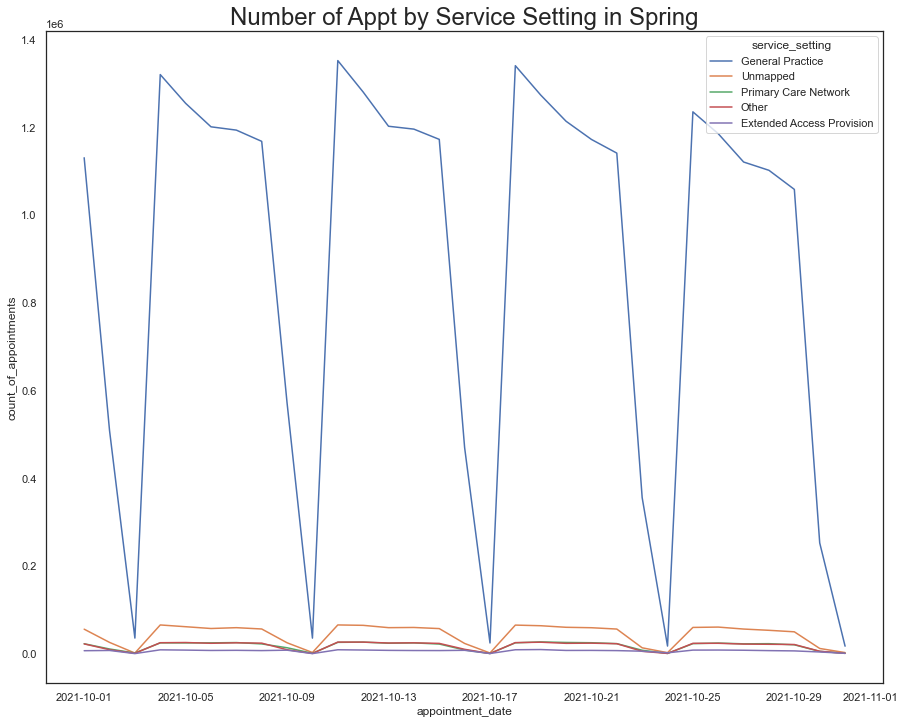

In [95]:
# Create lineplot for Spring (October 2021) with Service Setting differentiated by colour
line_nc_SS_Spring = sns.lineplot(x='appointment_date',\
                                 y='count_of_appointments', \
                                 hue='service_setting', \
                                 data=nc_SS_Spring, ci=None)

line_nc_SS_Spring.set_title("Number of Appt by Service Setting in Spring", size=24)

Text(0.5, 1.0, 'Number of Appt by Service Setting in Spring (excl. GP)')

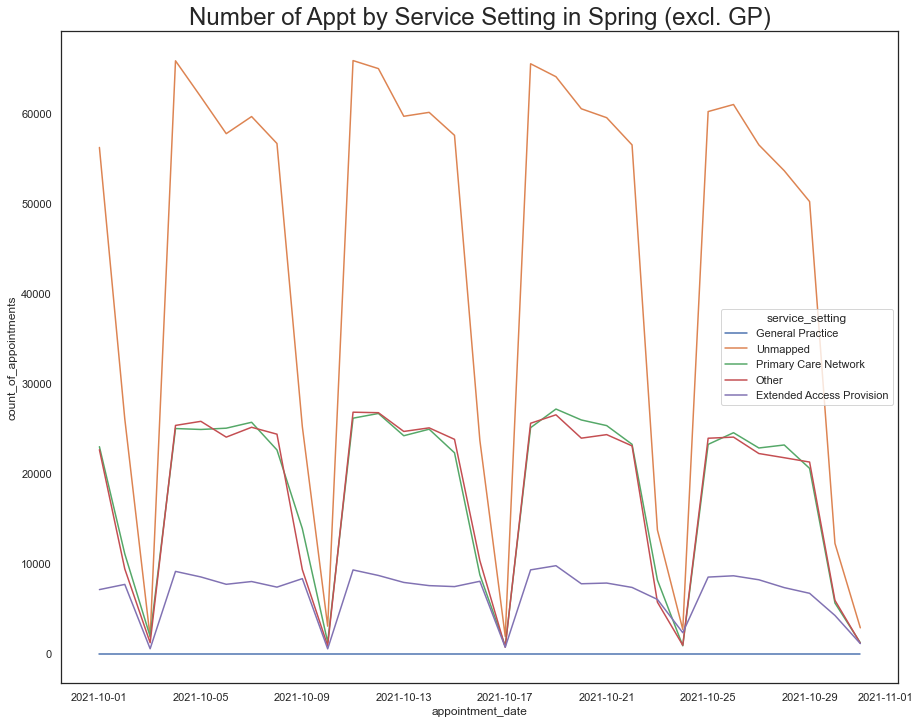

In [96]:
nc_nonGP_Spring = nc_Spring[nc_Spring['service_setting']!='General Practice']

nc_nonGP_Spring_appt = nc_nonGP_Spring.groupby(['service_setting','appointment_date'])\
                        .sum('count_of_appointments')

line_nc_nonGP_Spring_appt = sns.lineplot(x='appointment_date',\
                                 y='count_of_appointments', \
                                 hue='service_setting', \
                                 data=nc_nonGP_Spring_appt, ci=None)

line_nc_nonGP_Spring_appt.set_title("Number of Appt by Service Setting in Spring (excl. GP)", size=24)

# 
# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [97]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [ ]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')


# View the DataFrame.
